<a href="https://colab.research.google.com/github/kip-07/Maze_Solver/blob/main/UCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import heapq  # For priority queue
import networkx as nx  # For graph visualization
import matplotlib.pyplot as plt  # For plotting


In [2]:
def uniform_cost_search(graph, start, goal):
    """
    Perform Uniform Cost Search on a weighted graph.

    Args:
        graph (dict): Adjacency list representing the graph.
                      Keys are nodes, values are lists of tuples (neighbor, cost).
        start (str): Starting node.
        goal (str): Goal node.

    Returns:
        tuple: Optimal path as a list of nodes and the total cost.
    """
    # Priority queue: (cumulative_cost, city, path)
    pq = [(0, start, [start])]
    visited = set()

    while pq:
        # Pop the node with the least cost
        cost, city, path = heapq.heappop(pq)

        # Skip if the city is already visited
        if city in visited:
            continue

        # Mark city as visited
        visited.add(city)

        # Check if the goal is reached
        if city == goal:
            return path, cost

        # Explore neighbors
        for neighbor, travel_cost in graph.get(city, []):
            if neighbor not in visited:
                heapq.heappush(pq, (cost + travel_cost, neighbor, path + [neighbor]))

    # Return None if no path is found
    return None, float('inf')


In [3]:
# Example graph as an adjacency list
graph = {
    "A": [("B", 1), ("C", 3)],
    "B": [("A", 1), ("D", 1)],
    "C": [("A", 3), ("D", 1), ("E", 4)],
    "D": [("B", 1), ("C", 1), ("E", 1)],
    "E": [("C", 4), ("D", 1)]
}


In [4]:
# Test cases
queries = [
    ("A", "E"),  # Expected: Path: A -> B -> D -> E, Cost: 3
    ("A", "C")   # Expected: Path: A -> C, Cost: 3
]

for start, goal in queries:
    path, cost = uniform_cost_search(graph, start, goal)
    if path:
        print(f"Start: {start}, Goal: {goal}")
        print(f"Path: {' -> '.join(path)}, Cost: {cost}")
        print()
    else:
        print(f"Start: {start}, Goal: {goal}: No path found.\n")


Start: A, Goal: E
Path: A -> B -> D -> E, Cost: 3

Start: A, Goal: C
Path: A -> B -> D -> C, Cost: 3



Visualizing the optimal path: A -> B -> D -> E with cost: 3


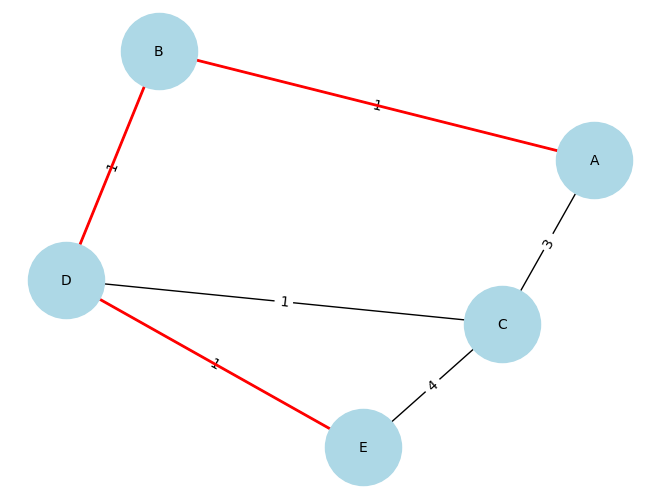

In [5]:
def visualize_graph(graph, path=None):
    """
    Visualize the graph using NetworkX and Matplotlib.

    Args:
        graph (dict): Adjacency list representing the graph.
        path (list): Optional. List of nodes representing the optimal path.
    """
    G = nx.Graph()

    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G)  # Generate positions for the nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight the path if provided
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()

# Example visualization
start, goal = "A", "E"
path, cost = uniform_cost_search(graph, start, goal)
if path:
    print(f"Visualizing the optimal path: {' -> '.join(path)} with cost: {cost}")
    visualize_graph(graph, path)
else:
    print("No path found for visualization.")


In [6]:
from collections import deque  # For BFS and DFS

In [7]:
def bfs(graph, start, goal):
    """
    Perform Breadth-First Search (BFS) on a graph.

    Args:
        graph (dict): Adjacency list representing the graph.
        start (str): Starting node.
        goal (str): Goal node.

    Returns:
        tuple: Path as a list of nodes and a flag indicating success.
    """
    queue = deque([(start, [start])])  # (current_node, path)
    visited = set()

    while queue:
        node, path = queue.popleft()

        if node in visited:
            continue
        visited.add(node)

        if node == goal:
            return path, True

        for neighbor, _ in graph.get(node, []):  # Ignore weights for BFS
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return None, False  # No path found


def dfs(graph, start, goal):
    """
    Perform Depth-First Search (DFS) on a graph.

    Args:
        graph (dict): Adjacency list representing the graph.
        start (str): Starting node.
        goal (str): Goal node.

    Returns:
        tuple: Path as a list of nodes and a flag indicating success.
    """
    stack = [(start, [start])]  # (current_node, path)
    visited = set()

    while stack:
        node, path = stack.pop()

        if node in visited:
            continue
        visited.add(node)

        if node == goal:
            return path, True

        for neighbor, _ in reversed(graph.get(node, [])):  # Ignore weights for DFS
            if neighbor not in visited:
                stack.append((neighbor, path + [neighbor]))

    return None, False  # No path found


In [9]:
# Test cases
queries = [
    ("A", "E"),  # Expected output for UCS: Path: A -> B -> D -> E, Cost: 3
    ("A", "C")   # Expected output for UCS: Path: A -> C, Cost: 3
]

for start, goal in queries:
    print(f"Start: {start}, Goal: {goal}")

    # BFS
    bfs_path, bfs_success = bfs(graph, start, goal)
    if bfs_success:
        print(f"BFS Path: {' -> '.join(bfs_path)}")
    else:
        print("BFS: No path found.")

    # DFS
    dfs_path, dfs_success = dfs(graph, start, goal)
    if dfs_success:
        print(f"DFS Path: {' -> '.join(dfs_path)}")
    else:
        print("DFS: No path found.")

    # UCS
    ucs_path, ucs_cost = uniform_cost_search(graph, start, goal)
    if ucs_path:
        print(f"UCS Path: {' -> '.join(ucs_path)}, Cost: {ucs_cost}")
    else:
        print("UCS: No path found.")

    print()


Start: A, Goal: E
BFS Path: A -> C -> E
DFS Path: A -> B -> D -> C -> E
UCS Path: A -> B -> D -> E, Cost: 3

Start: A, Goal: C
BFS Path: A -> C
DFS Path: A -> B -> D -> C
UCS Path: A -> B -> D -> C, Cost: 3

